In [1]:
import numpy as np
from unidimensional import UnidimSearch
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
def plot(fn, a, b, eps):
    dich = UnidimSearch('dichotomy')
    golden = UnidimSearch('golden')
    fib = UnidimSearch('fibonacci')
    d = dich(fn, a, b, eps)
    g = golden(fn, a, b, eps)
    f = fib(fn, a, b, eps)
    fig = plt.figure(figsize=(16, 12))
    fig.suptitle(f'Unidimensional search methods performance for {fn.__name__}(x) function in [{a}, {b}] with eps = {eps}')
    gs = fig.add_gridspec(2, 2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[1, 1])
    ax4 = fig.add_subplot(gs[0, 1])
    sp = np.linspace(a, b, 100)
    ax1.plot(sp, fn(sp), label=f'{fn.__name__}')
    ax1.plot([d['min']], [fn(d['min'])], marker='x', markersize=9, label='dichotomy min')
    ax1.plot([g['min']], [fn(g['min'])], marker='x', markersize=9, label='golden min')
    ax1.plot([f['min']], [fn(f['min'])], marker='x', markersize=9, label='fibonacci min')
    ax1.set_xlabel('x')
    ax1.set_ylabel(f'{fn.__name__}(x)')
    ax1.set_title('Function plot')
    ax1.legend()
    ax2.plot(d['intervals'], alpha=0.6, label='dichotomy')
    ax2.plot(g['intervals'], alpha=0.6, label='golden')
    ax2.plot(f['intervals'], alpha=0.6, label='fibonacci')
    ax2.set_xlabel('iterations')
    ax2.set_ylabel('interval size')
    ax2.legend()
    ax2.set_title('Interval change')
    x = np.arange(3)
    width = 0.3
    ax3.bar(x-width/2, [d['iterations'], g['iterations'], f['iterations']], width=width, label='iterations')
    ax3.bar(x+width/2, [d['call_count'], g['call_count'], f['call_count']], width=width, label='function calls')
    ax3.set_xticks(np.arange(3))
    ax3.set_xticklabels(['dichotomy', 'golden', 'fibonacci'])
    ax3.set_title('Number of iterations and function calls')
    ax3.legend()
    ax4.plot(d['intervals'][:-1] / d['intervals'][1:], label='dichotomy')
    ax4.plot(g['intervals'][:-1] / g['intervals'][1:], label='golden')
    ax4.plot(np.divide(f['intervals'][:-1], f['intervals'][1:], 
                       out=np.zeros_like(f['intervals'][:-1]), 
                       where=f['intervals'][1:]!=0), 
             label='fibonacci')
    ax4.set_xlabel('iterations')
    ax4.set_ylabel('interval change')
    ax4.set_title('Interval change')
    ax4.legend()
    return fig

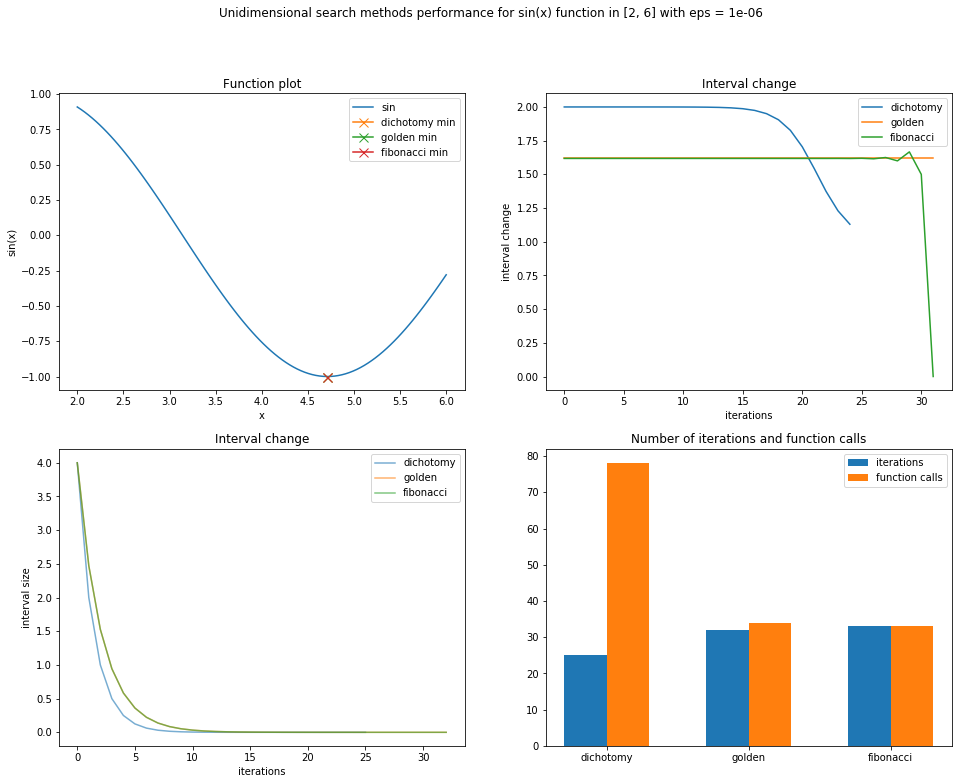

In [10]:
plot(np.sin, 2, 6, 1e-6);

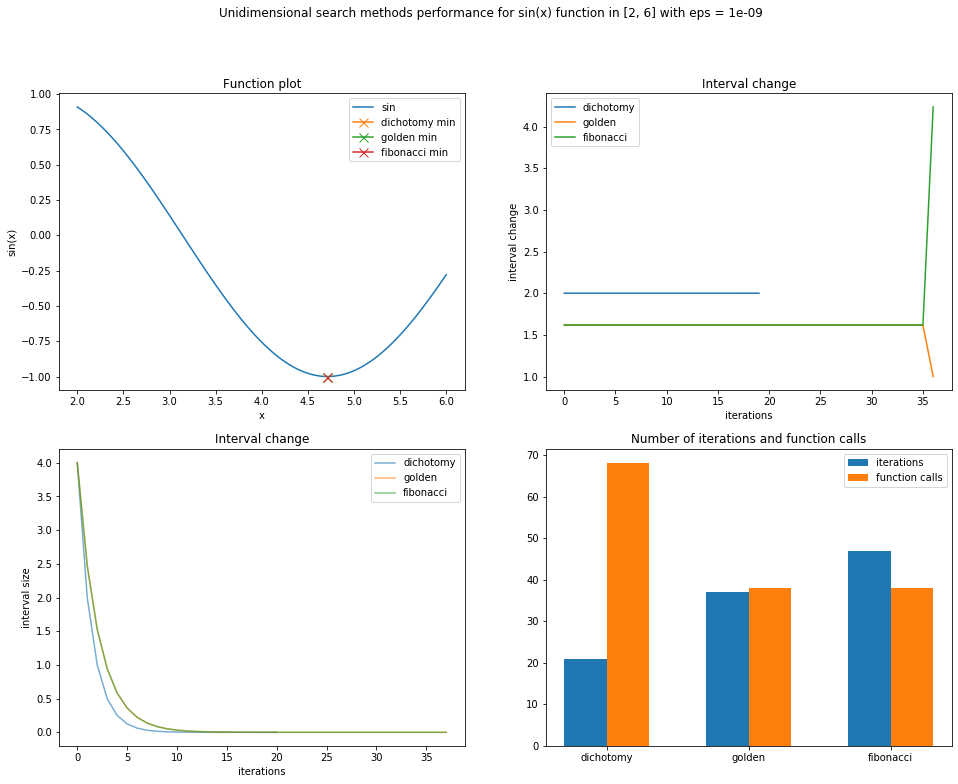

In [8]:
plot(np.sin, 2, 6, 1e-9);

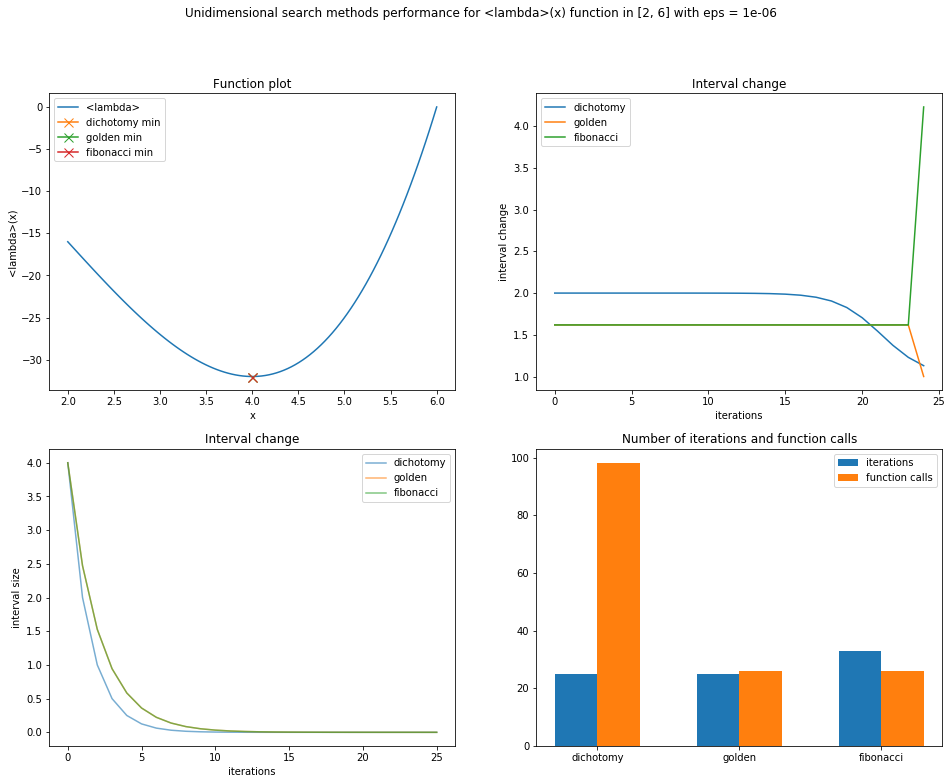

In [3]:
plot(lambda x: x**3 - 6*x**2, 2, 6, 1e-6);